## Assignment 2

Necessary Functions and Variable Definitions

In [15]:
# libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# constants
V = 4           # liters
Q = 0.5         # liters/hour
MIC = 5         # mg/liter
MBC = 8         # mg/liter

# plotting function
def plotConcentration(soln):
    fig, ax = plt.subplots(1, 1)
    ax.plot(soln.t, soln.y[0])
    ax.set_xlim(0, max(soln.t))
    ax.plot(ax.get_xlim(), [MIC, MIC], 'g--', ax.get_xlim(), [MBC, MBC], 'r--')
    ax.legend(['Antibiotic Concentration','MIC','MBC'])
    ax.set_xlabel('Time [hrs]')
    ax.set_ylabel('Concentration [mg/liter]')
    ax.set_title('One Compartment Model with Known Initial Condition');

# define function
def deriv(t, C):
    return u(t)/V - (Q/V)*C

Question 1

The total amount of drug administered was 960 mg.


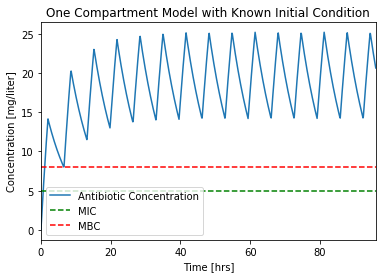

In [16]:
# parameter values
td = 2           # length of administration for a single dose
tdose = 6.6      # time between doses
Udose = 64       # mg

# function defintion
def u(t):
    if t <= 0:
        return 0
    elif t % tdose <= td:
    # % gives remainder of t/tdose
        return Udose/td
    else:
        return 0

# specify time span and evaluation points
t_span = [0, 96]
t_eval = np.linspace(0, 96, 1000)

# initial conditions
C_initial = 0
IC = [C_initial]

def mbc_crossing(t, y):
    return MBC - y[0]

# compute solution
soln = solve_ivp(deriv, t_span, IC, t_eval=t_eval, max_step=0.1)

# display solution
plotConcentration(soln)

# compute and display the total amount of drug released
n_doses = round(t_span[1]/tdose)
tot_drug = n_doses*Udose
print("The total amount of drug administered was " + str(tot_drug) + " mg.")

Question 2

Steady-state solution:
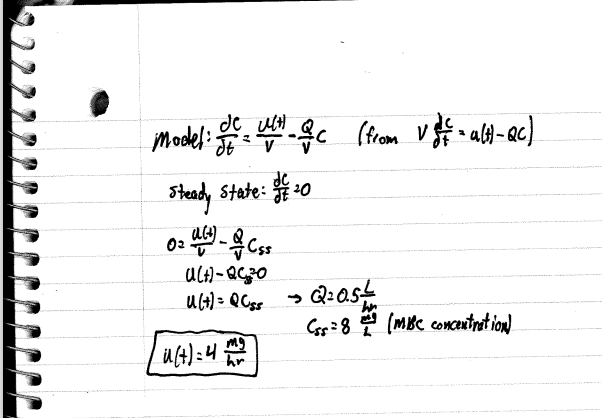

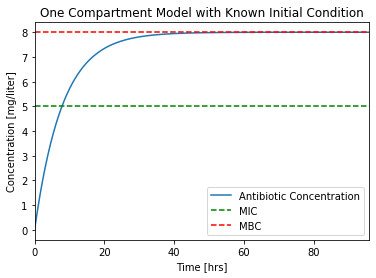

In [17]:
# function defintion
def u(t):
        return 4   # mg/hr

# specify time span and evaluation points
t_span = [0, 96]
t_eval = np.linspace(0, 96, 1000)

# initial conditions
C_initial = 0
IC = [C_initial]

def mbc_crossing(t, y):
    return MBC - y[0]

# compute solution
soln = solve_ivp(deriv, t_span, IC, t_eval=t_eval, max_step=0.1)

# display solution
plotConcentration(soln)

If the initial concentration is considered to be at the MBC or above, the curve will never drop below the MBC.  This is shown in multiple simulations below:

Here, the initial concentration is exactly 8 mg/L.  The function C(t) is flat, exactly at the MBC.


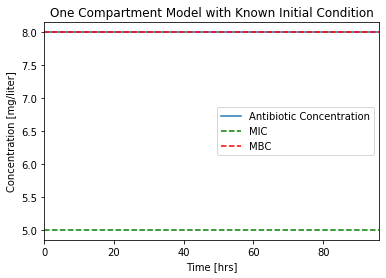

In [18]:
# function defintion
def u(t):
        return 4   # mg/hr

# specify time span and evaluation points
t_span = [0, 96]
t_eval = np.linspace(0, 96, 1000)

# initial conditions
C_initial = 8
IC = [C_initial]

def mbc_crossing(t, y):
    return MBC - y[0]

# compute solution
soln = solve_ivp(deriv, t_span, IC, t_eval=t_eval, max_step=0.1)

# display solution
plotConcentration(soln)
print("Here, the initial concentration is exactly 8 mg/L.  The function C(t) is flat, exactly at the MBC.")

Here, the initial concentration is set at 13 mg/L, above the MBC.  The function is always at or above the MBC.


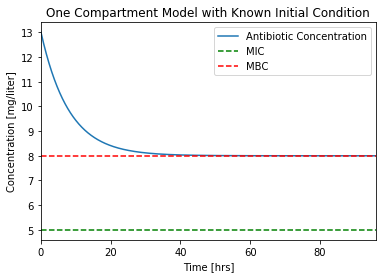

In [19]:
# function defintion
def u(t):
        return 4   # mg/hr

# specify time span and evaluation points
t_span = [0, 96]
t_eval = np.linspace(0, 96, 1000)

# initial conditions
C_initial = 13
IC = [C_initial]

def mbc_crossing(t, y):
    return MBC - y[0]

# compute solution
soln = solve_ivp(deriv, t_span, IC, t_eval=t_eval, max_step=0.1)

# display solution
plotConcentration(soln)
print("Here, the initial concentration is set at 13 mg/L, above the MBC.  The function is always at or above the MBC.")